## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often had to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

You can install it using the Anaconda Environment tab, or by executing the following in your terminal pip install seaborn or conda install seaborn.

Shift + Tab after attribute to see options

### import

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

# MI Data

In [116]:
# IWB temp data from online source
weatherbuoy_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IWBNetwork.csvp?station_id%2Ctime%2CAtmosphericPressure%2CWindDirection%2CWindSpeed%2CWaveHeight%2CWavePeriod%2CSeaTemperature%2Csalinity')

# from local source
# weatherbuoy_df = pd.read_csv('data\IWBNetwork_archive.csv')
weatherbuoy_df['time (UTC)'] = pd.to_datetime(weatherbuoy_df['time (UTC)'])
weatherbuoy_df['year'] = weatherbuoy_df['time (UTC)'].dt.year
weatherbuoy_df['month'] = weatherbuoy_df['time (UTC)'].dt.month
weatherbuoy_df['day'] = weatherbuoy_df['time (UTC)'].dt.day
weatherbuoy_df['mean_yr_station'] = weatherbuoy_df.groupby(['year', 'station_id'])[
    "SeaTemperature (degrees_C)"].transform('mean')
weatherbuoy_df['min_yr_station'] = weatherbuoy_df.groupby(['year', 'station_id'])[
    "SeaTemperature (degrees_C)"].transform('min')
weatherbuoy_df['max_yr_station'] = weatherbuoy_df.groupby(['year', 'station_id'])[
    "SeaTemperature (degrees_C)"].transform('max')
# convert number months to the text months for easier display
weatherbuoy_df['months'] = weatherbuoy_df['time (UTC)'].dt.strftime('%b')

weatherbuoy_df.head

<bound method NDFrame.head of        station_id                time (UTC)  AtmosphericPressure (millibars)  \
0              M1 2001-02-06 13:00:00+00:00                          967.600   
1              M1 2001-02-06 14:00:00+00:00                          969.800   
2              M1 2001-02-06 15:00:00+00:00                          972.000   
3              M1 2001-02-06 16:00:00+00:00                          973.600   
4              M1 2001-02-06 18:00:00+00:00                          976.400   
...           ...                       ...                              ...   
769332         M5 2022-04-03 13:00:00+00:00                         1028.394   
769333         M2 2022-04-03 14:00:00+00:00                         1025.305   
769334         M5 2022-04-03 14:00:00+00:00                         1028.162   
769335         M4 2022-04-03 14:00:00+00:00                         1022.864   
769336         M3 2022-04-03 14:00:00+00:00                         1029.358   

        W

In [59]:
# IGFS Published Data
igfs_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/imi_feas_obs_sp.csvp?Year%2CQuarter%2CICES_Area%2CGear_Code%2CScientific_Name%2CCommon_Name%2CAphiaID%2CDemersal_At_Sea_Scheme_Age_Observations%2CDemersal_At_Sea_Scheme_Biological_Observations%2CDemersal_At_Sea_Scheme_Length_Observations%2CPelagic_At_Sea_Scheme_Age_Observations%2CPelagic_At_Sea_Scheme_Biological_Observations%2CPelagic_At_Sea_Scheme_Length_Observations%2CNephrops_At_Sea_Scheme_Age_Observations%2CNephrops_At_Sea_Scheme_Biological_Observations%2CNephrops_At_Sea_Scheme_Length_Observations%2CPort_Sampling_Scheme_Age_Observations%2CPort_Sampling_Scheme_Biological_Observations%2CPort_Sampling_Scheme_Length_Observations')
igfs_df.head

<bound method NDFrame.head of        Year  Quarter ICES_Area Gear_Code           Scientific_Name  \
0      1960        1    27.7.g   Unknown           Clupea harengus   
1      1960        4    27.7.a       PTM           Clupea harengus   
2      1960        4    27.7.a   Unknown           Clupea harengus   
3      1961        4    27.7.a   Unknown           Clupea harengus   
4      1961        4    27.7.b   Unknown           Clupea harengus   
...     ...      ...       ...       ...                       ...   
35278  2019        3    27.7.j       TWR  Melanogrammus aeglefinus   
35279  2019        3    27.7.j       TWR     Pleuronectes platessa   
35280  2019        3    27.7.j       TWR               Solea solea   
35281  2019        3    27.7.j       TWR         Lophius budegassa   
35282  2019        3    27.7.j       TWR      Merlangius merlangus   

               Common_Name   AphiaID  Demersal_At_Sea_Scheme_Age_Observations  \
0         Atlantic Herring  126417.0            

In [121]:
# Tide Prediction Data
# Howth
tide_pred_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IMI-TidePrediction.csvp?time%2Clongitude%2Clatitude%2CstationID%2CWater_Level%2CWater_Level_ODM&time%3E=2022-01-01&time%3C=2025-01-01T00%3A20%3A00Z&stationID=%22Howth%22')

tide_pred_df['time (UTC)'] = pd.to_datetime(tide_pred_df['time (UTC)'])
tide_pred_df['year'] = tide_pred_df['time (UTC)'].dt.year
tide_pred_df['month'] = tide_pred_df['time (UTC)'].dt.month
tide_pred_df['day'] = tide_pred_df['time (UTC)'].dt.day
tide_pred_df['mean_yr_station'] = tide_pred_df.groupby(['year', 'stationID'])[
    "Water_Level (metres)"].transform('mean')
tide_pred_df['min_yr_station'] = tide_pred_df.groupby(['year', 'stationID'])[
    "Water_Level (metres)"].transform('min')
tide_pred_df['max_yr_station'] = tide_pred_df.groupby(['year', 'stationID'])[
    "Water_Level (metres)"].transform('max')
# convert number months to the text months for easier display
tide_pred_df['months'] = tide_pred_df['time (UTC)'].dt.strftime('%b')
tide_pred_df

time (UTC)  longitude (degrees_east)  \
0      2022-01-01 00:00:00+00:00                   -6.0683   
1      2022-01-01 00:05:00+00:00                   -6.0683   
2      2022-01-01 00:10:00+00:00                   -6.0683   
3      2022-01-01 00:15:00+00:00                   -6.0683   
4      2022-01-01 00:20:00+00:00                   -6.0683   
...                          ...                       ...   
315644 2024-12-31 23:40:00+00:00                   -6.0683   
315645 2024-12-31 23:45:00+00:00                   -6.0683   
315646 2024-12-31 23:50:00+00:00                   -6.0683   
315647 2024-12-31 23:55:00+00:00                   -6.0683   
315648 2025-01-01 00:00:00+00:00                   -6.0683   

        latitude (degrees_north) stationID  Water_Level (metres)  \
0                       53.39148     Howth                  2.95   
1                       53.39148     Howth                  2.87   
2                       53.39148     Howth                  2.80   
3                       53.39148     Howth                  2.72   
4                       53.39148     Howth                  2.65   
...                          ...       ...                   ...   
315644                  53.39148     Howth                  4.01   
315645                  53.39148     Howth                  4.03   
315646                  53.39148     Howth                  4.04   
315647                  53.39148     Howth                  4.05   
315648                  53.39148     Howth                  4.05   

        Water_Level_ODM (metres)  year  month  day  mean_yr_station  \
0                           0.27  2022      1    1         2.588278   
1                           0.19  2022      1    1         2.588278   
2                           0.12  2022      1    1         2.588278   
3                           0.04  2022      1    1         2.588278   
4                          -0.03  2022      1    1         2.588278   
...                          ...   ...    ...  ...              ...   
315644                      1.33  2024     12   31         2.589858   
315645                      1.35  2024     12   31         2.589858   
315646                      1.36  2024     12   31         2.589858   
315647                      1.37  2024     12   31         2.589858   
315648                      1.37  2025      1    1         4.050000   

        min_yr_station  max_yr_station months  
0                 0.26            4.78    Jan  
1                 0.26            4.78    Jan  
2                 0.26            4.78    Jan  
3                 0.26            4.78    Jan  
4                 0.26            4.78    Jan  
...                ...             ...    ...  
315644            0.04            4.86    Dec  
315645            0.04            4.86    Dec  
315646            0.04            4.86    Dec  
315647            0.04            4.86    Dec  
315648            4.05            4.05    Jan  

[315649 rows x 13 columns]

In [146]:
# Wave Buoy Data
# AMETS Berth A 2021/2
wave_df = pd.read_csv('https://erddap.marine.ie/erddap/tabledap/IWaveBNetwork.csvp?time%2Cstation_id%2Cinstrument%2CPeakPeriod%2CPeakDirection%2CUpcrossPeriod%2CSignificantWaveHeight%2CSeaTemperature%2CHmax%2CTHmax%2CMeanCurDirTo%2CMeanCurSpeed&time%3E=2021-04-01&time%3C=2022-03-31&station_id=%22AMETS%20Berth%20A%20Wave%20Buoy%22')

wave_df['time (UTC)'] = pd.to_datetime(wave_df['time (UTC)'])
wave_df['year'] = wave_df['time (UTC)'].dt.year
wave_df['month'] = wave_df['time (UTC)'].dt.month
wave_df['day'] = wave_df['time (UTC)'].dt.day

# convert number months to the text months for easier display
wave_df['months'] = wave_df['time (UTC)'].dt.strftime('%b')
wave_df

time (UTC)               station_id  \
0      2021-04-01 00:00:00+00:00  AMETS Berth A Wave Buoy   
1      2021-04-01 00:03:00+00:00  AMETS Berth A Wave Buoy   
2      2021-04-01 00:07:00+00:00  AMETS Berth A Wave Buoy   
3      2021-04-01 00:10:00+00:00  AMETS Berth A Wave Buoy   
4      2021-04-01 00:13:00+00:00  AMETS Berth A Wave Buoy   
...                          ...                      ...   
146517 2022-03-30 23:47:00+00:00  AMETS Berth A Wave Buoy   
146518 2022-03-30 23:50:00+00:00  AMETS Berth A Wave Buoy   
146519 2022-03-30 23:53:00+00:00  AMETS Berth A Wave Buoy   
146520 2022-03-30 23:57:00+00:00  AMETS Berth A Wave Buoy   
146521 2022-03-31 00:00:00+00:00  AMETS Berth A Wave Buoy   

                      instrument  PeakPeriod (s)  \
0       Datawell WaveRider MkIII           10.00   
1       Datawell WaveRider MkIII           10.00   
2       Datawell WaveRider MkIII           10.00   
3       Datawell WaveRider MkIII           10.00   
4       Datawell WaveRider MkIII           11.11   
...                          ...             ...   
146517  Datawell WaveRider MkIII            8.33   
146518  Datawell WaveRider MkIII            8.33   
146519  Datawell WaveRider MkIII            8.00   
146520  Datawell WaveRider MkIII            8.00   
146521  Datawell WaveRider MkIII            8.00   

        PeakDirection (degrees_true)  UpcrossPeriod (s)  \
0                                6.3              7.833   
1                                5.6              7.817   
2                               12.8              7.838   
3                               12.3              7.848   
4                                8.6              7.776   
...                              ...                ...   
146517                          10.3              6.198   
146518                          12.4              6.199   
146519                          11.0              6.299   
146520                          10.1              6.301   
146521                           9.3              6.265   

        SignificantWaveHeight (cm)  SeaTemperature (degree_C)  Hmax (cm)  \
0                            313.3                        NaN      491.0   
1                            317.6                        NaN        NaN   
2                            322.7                        NaN        NaN   
3                            321.7                        NaN        NaN   
4                            319.3                        NaN        NaN   
...                            ...                        ...        ...   
146517                       278.8                        NaN        NaN   
146518                       276.8                        NaN        NaN   
146519                       288.0                        NaN        NaN   
146520                       288.9                        NaN        NaN   
146521                       285.1                        NaN      438.0   

        THmax (s)  MeanCurDirTo (degrees_true)  MeanCurSpeed (m/s)  year  \
0           10.01                          NaN                 NaN  2021   
1             NaN                          NaN                 NaN  2021   
2             NaN                          NaN                 NaN  2021   
3             NaN                          NaN                 NaN  2021   
4             NaN                          NaN                 NaN  2021   
...           ...                          ...                 ...   ...   
146517        NaN                          NaN                 NaN  2022   
146518        NaN                          NaN                 NaN  2022   
146519        NaN                          NaN                 NaN  2022   
146520        NaN                          NaN                 NaN  2022   
146521       8.27                          NaN                 NaN  2022   

        month  day months  
0           4    1    Apr  
1           4    1    Apr  
2           4    1    Apr  
3           4    

In [111]:
# simplified data - one station
# m2 = Irish Sea
m2_df = weatherbuoy_df[(weatherbuoy_df.station_id == 'M2')]
# m5 = Celtic Sea
m5_df = weatherbuoy_df[(weatherbuoy_df.station_id == 'M5')]

### Import Data

In [3]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


/Users/derekbanas/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /Users/derekbanas/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


### Distribution Plots

### Distribution Plot

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SignificantWaveHeight (cm)', ylabel='Density'>

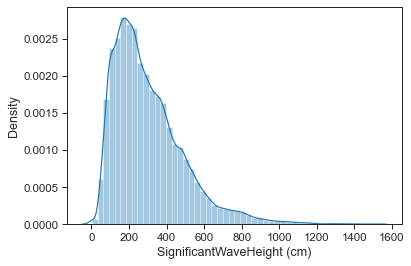

In [147]:
sns.distplot(wave_df['SignificantWaveHeight (cm)'])

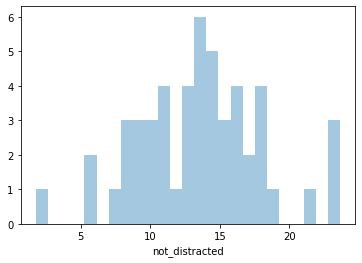

In [4]:
# Provides a way to look at a univariate distribution. A 
# univeriate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=False, bins=25)

### Joint Plot

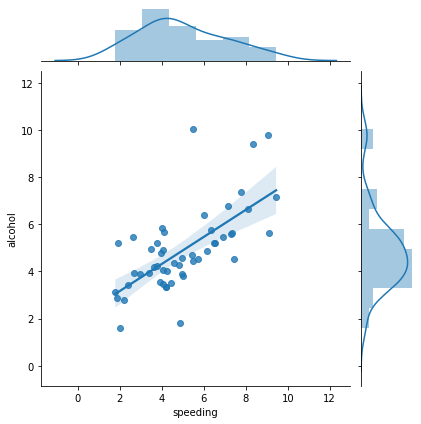

In [5]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

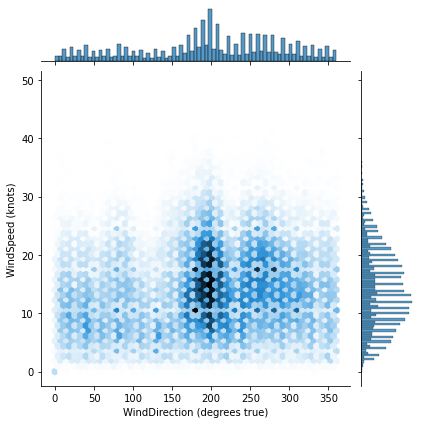

In [21]:
sns.jointplot(x='WindDirection (degrees true)', y='WindSpeed (knots)', data=m2_df, kind='hex')

### KDE Plot

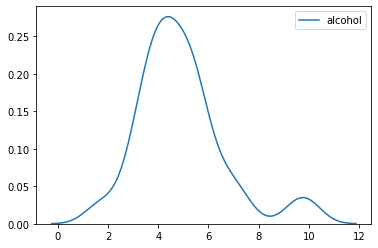

In [6]:
# Get just the KDE plot
sns.kdeplot(tide_pred_df['alcohol'])

<AxesSubplot:xlabel='Water_Level (metres)', ylabel='Density'>

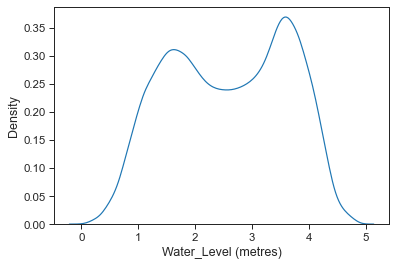

In [142]:
sns.kdeplot(tide_pred_df['Water_Level (metres)'])

### Pair Plots

In [16]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

NameError: name 'crash_df' is not defined

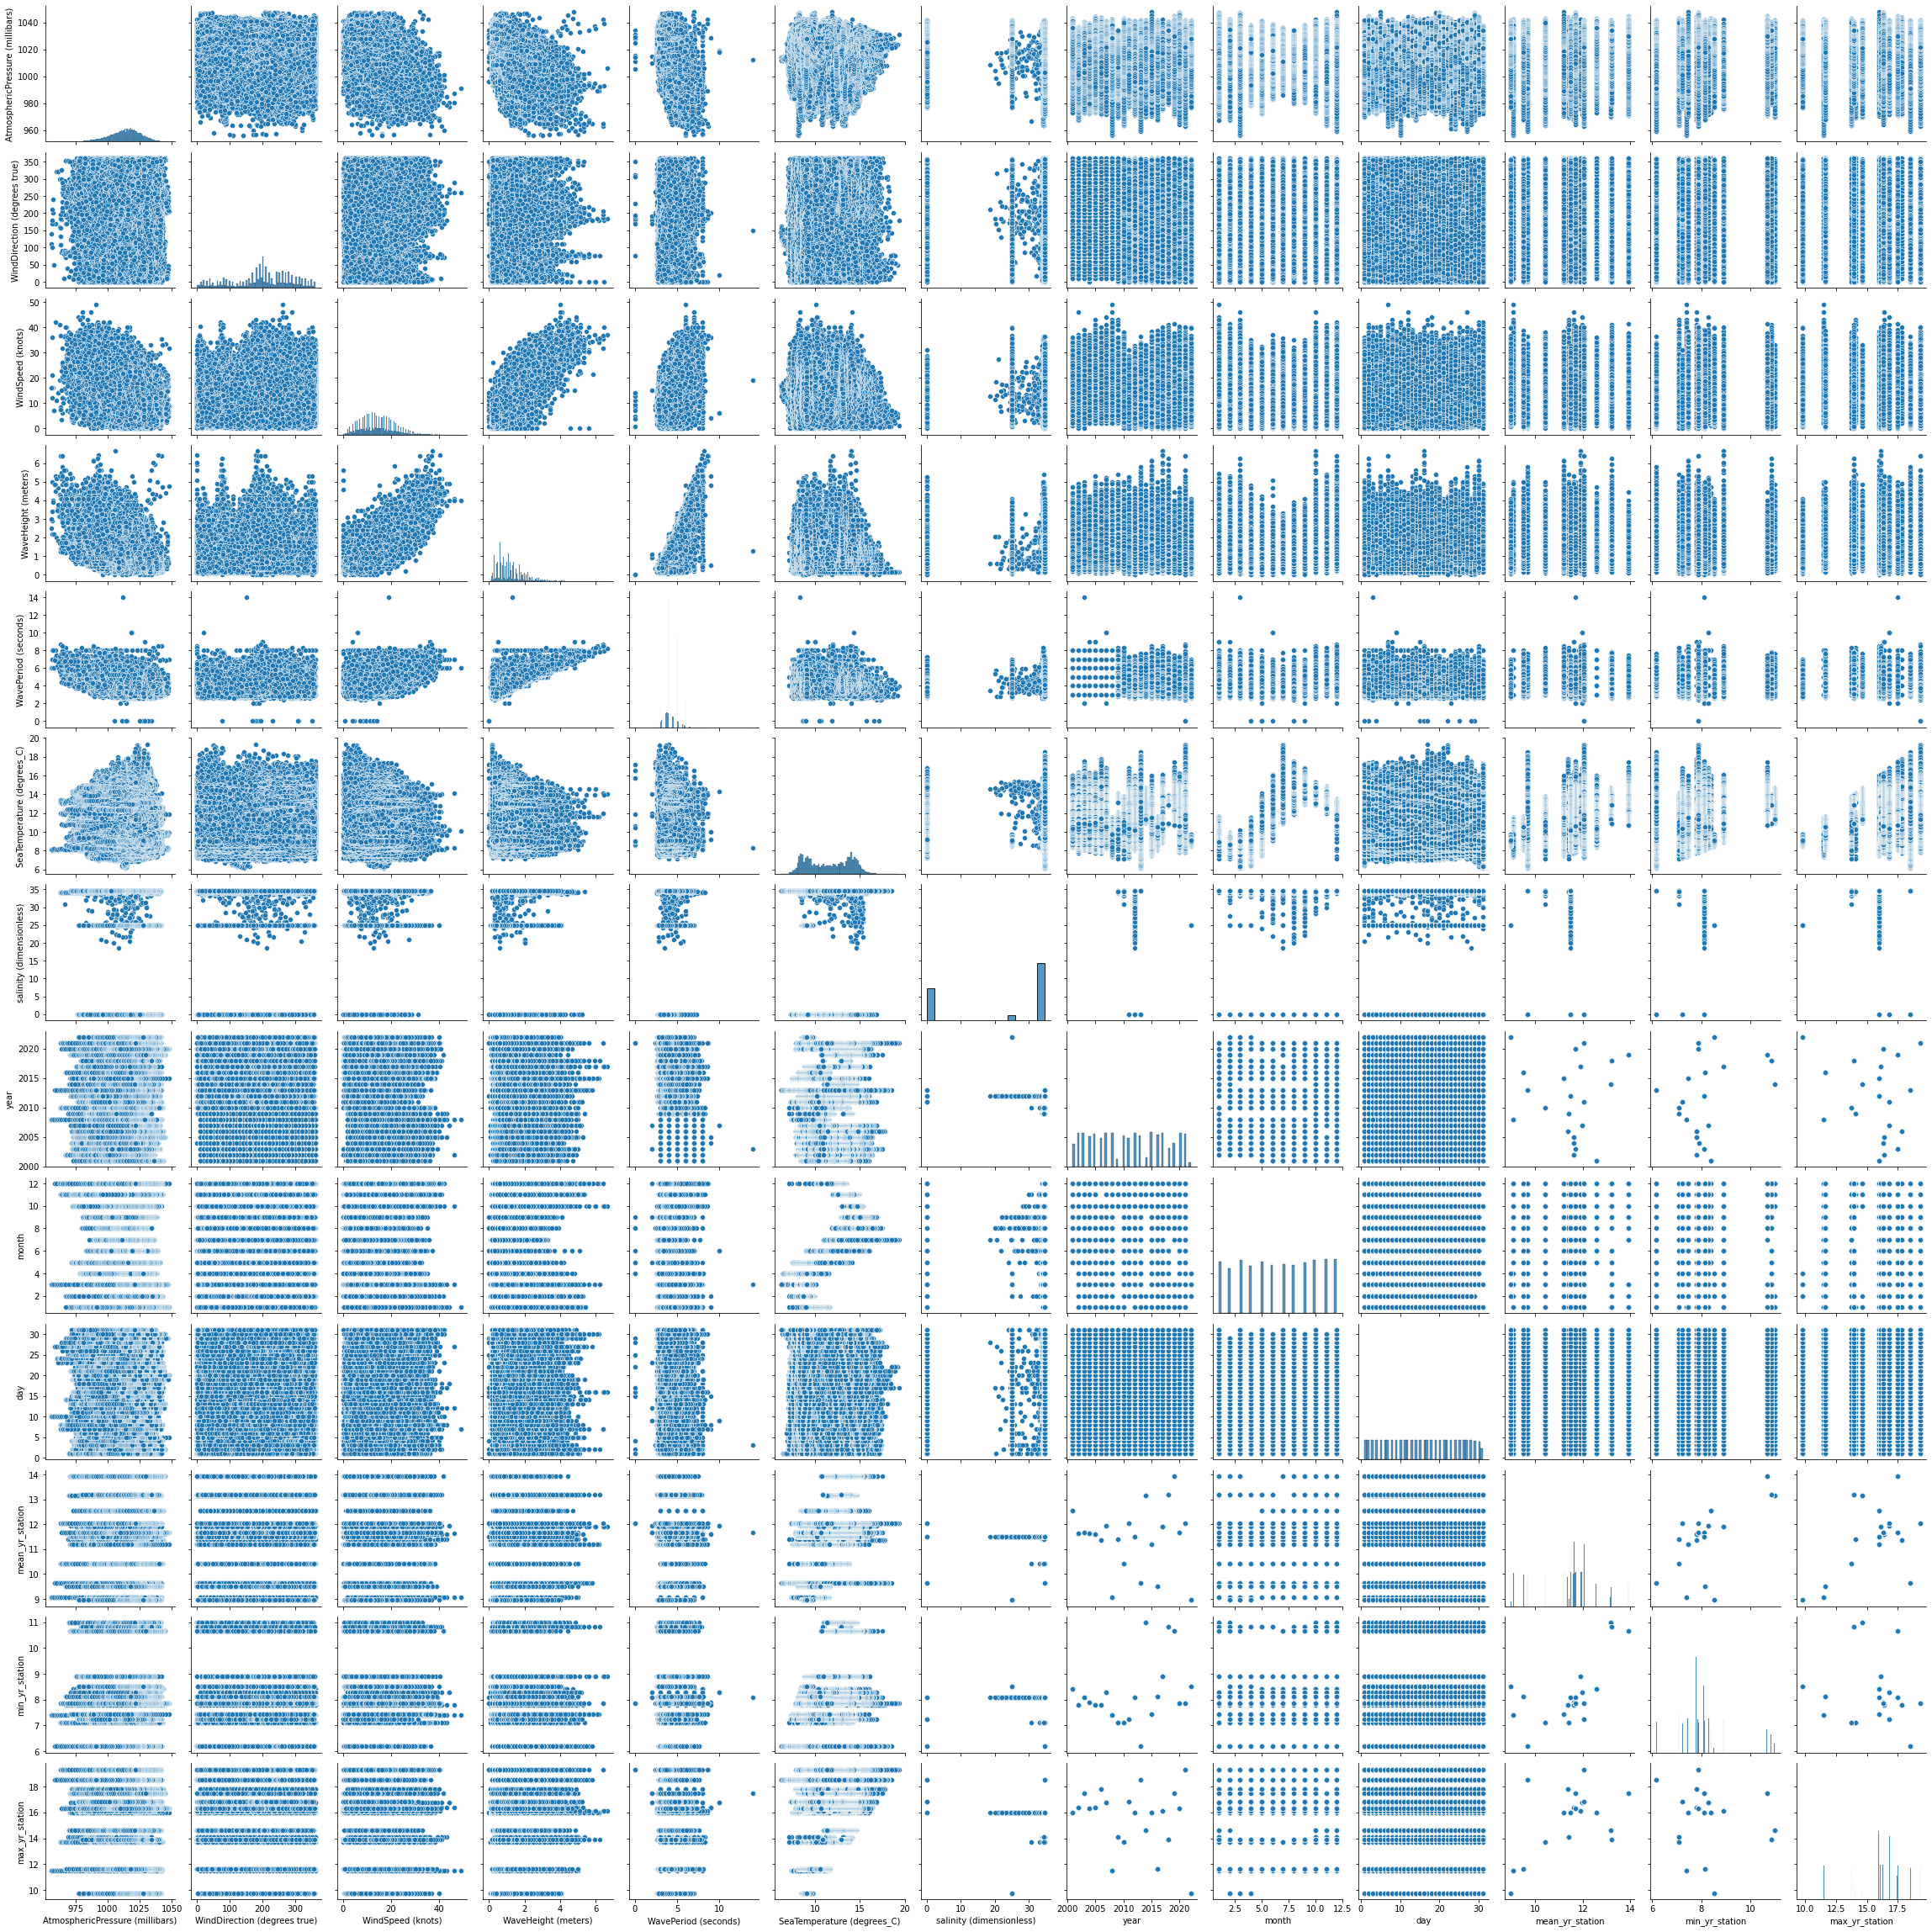

In [17]:
sns.pairplot(m2_df)

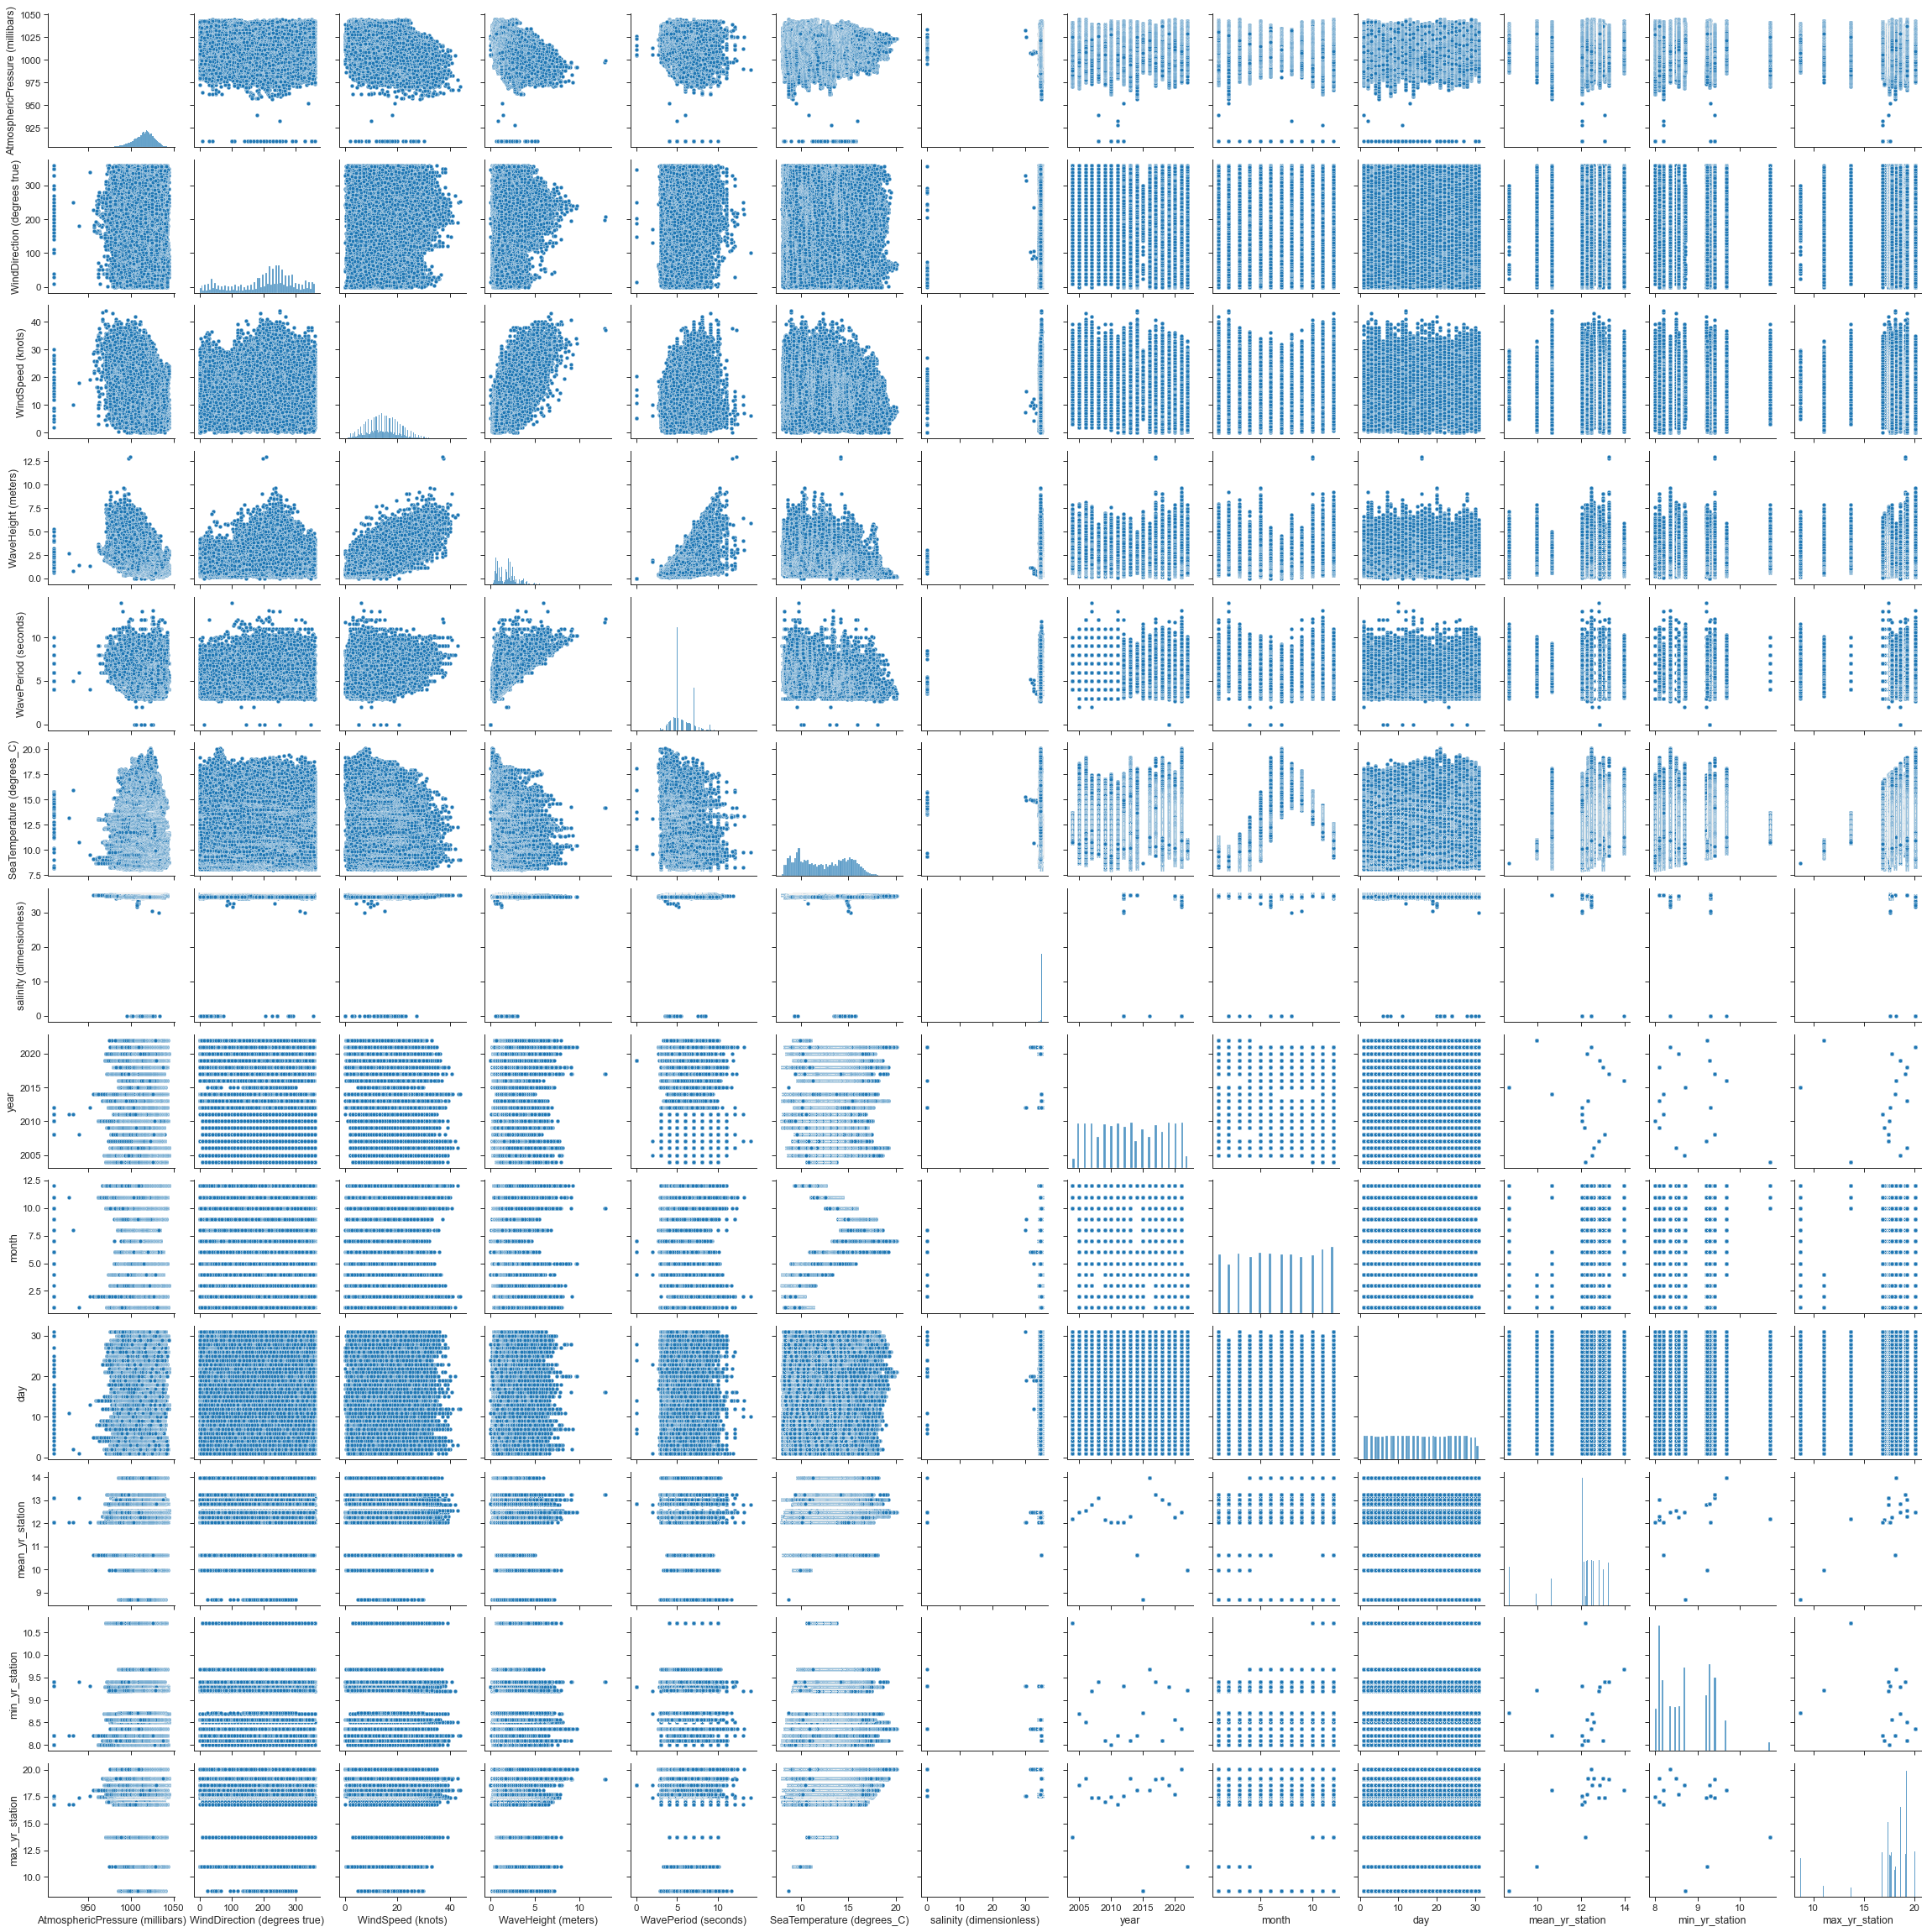

In [64]:
sns.pairplot(m5_df, palette='plasma')

### Rug Plots

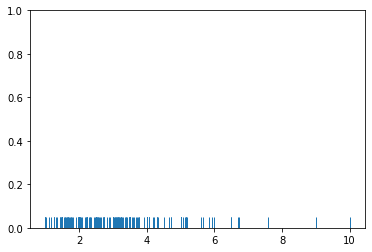

In [8]:
# Plots a single column of datapoints in an array as sticks on an axis
# With a rug plot you'll see a more dense number of lines where the amount is 
# most common. This is like how a histogram is taller where values are more common
sns.rugplot(tips_df['tip'])

<AxesSubplot:xlabel='SignificantWaveHeight (cm)'>

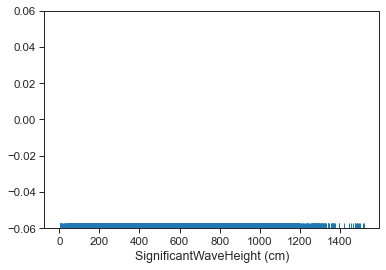

In [148]:
sns.rugplot(wave_df['SignificantWaveHeight (cm)'])

### Styling

<Figure size 1152x720 with 0 Axes>

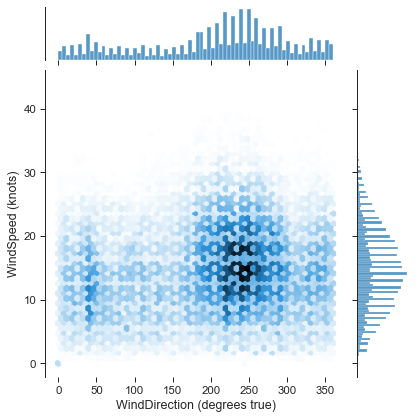

In [58]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('ticks')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(16,10))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.3)

sns.jointplot(x='WindDirection (degrees true)', y='WindSpeed (knots)', data=m5_df, kind='hex', palette='Reds')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=True)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='year', ylabel='WindSpeed (knots)'>

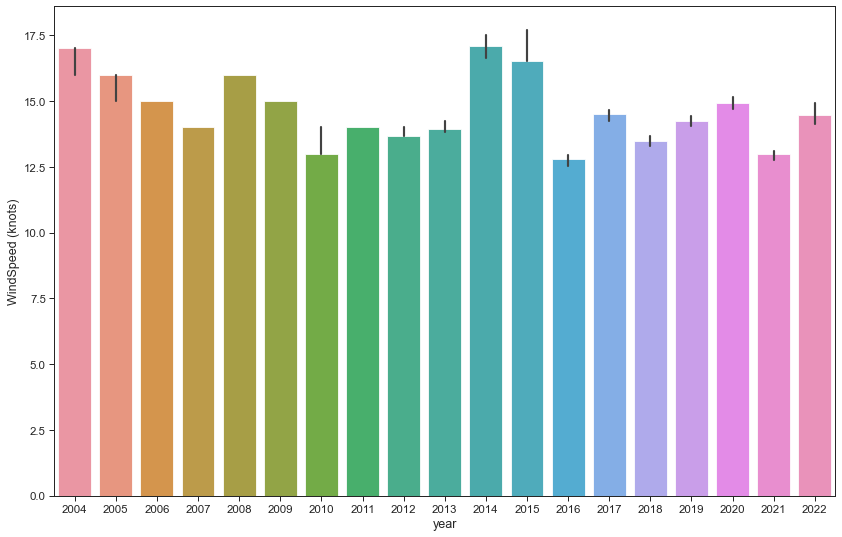

In [144]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
plt.figure(figsize=(14,9))

sns.barplot(x='year',y='WindSpeed (knots)',data=m5_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='count', ylabel='mean_yr_station'>

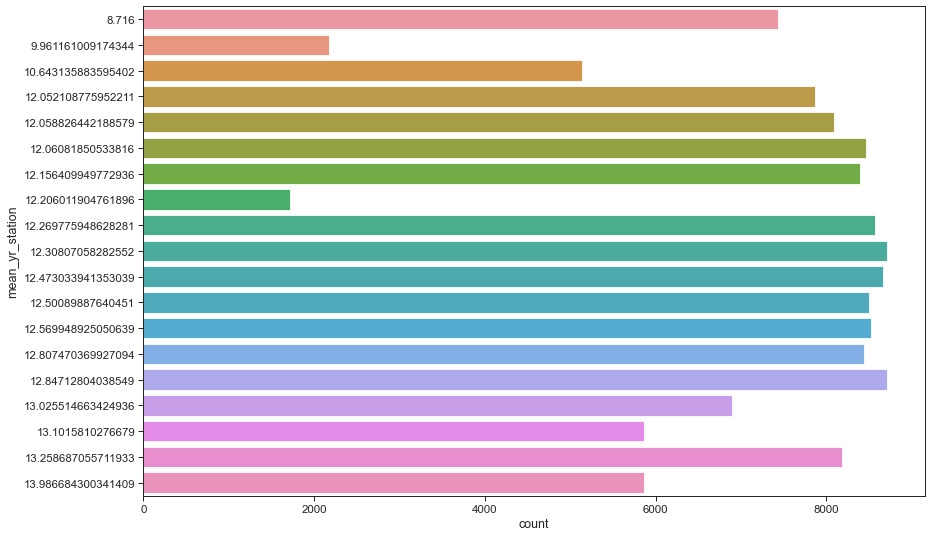

In [145]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
plt.figure(figsize=(14,9))

sns.countplot(y='mean_yr_station', data=m5_df)

### Box Plot

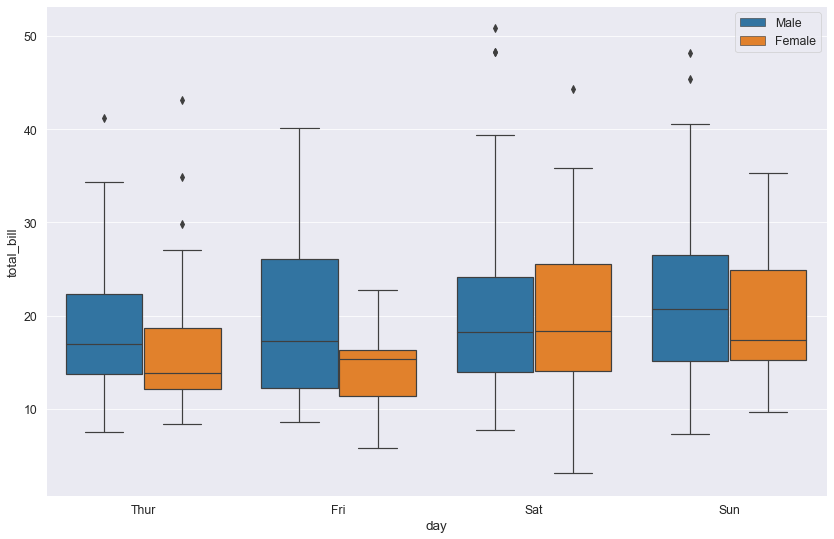

In [17]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

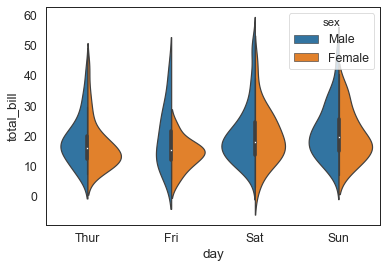

In [277]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

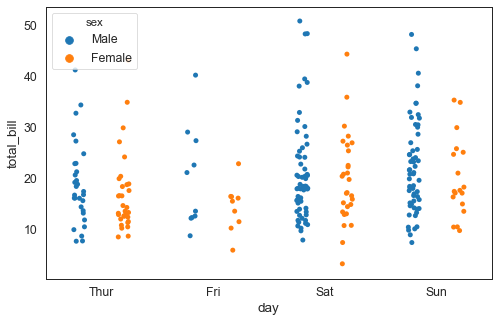

In [279]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

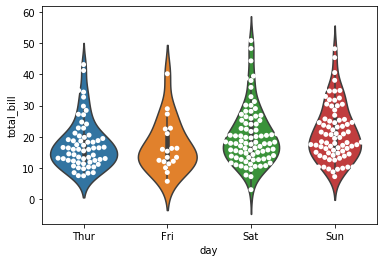

In [201]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

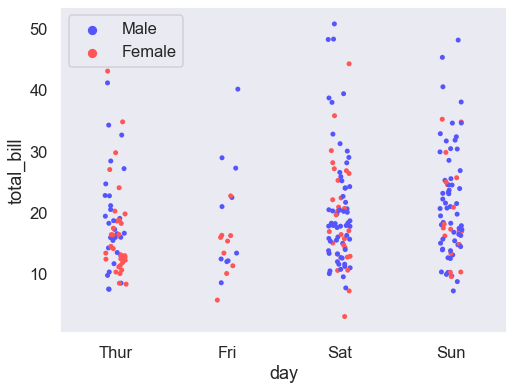

In [280]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

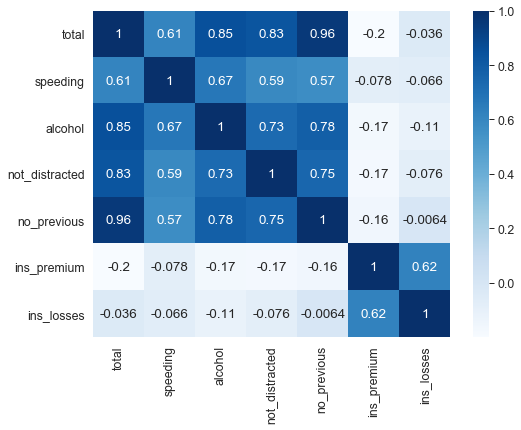

In [296]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues')

<AxesSubplot:>

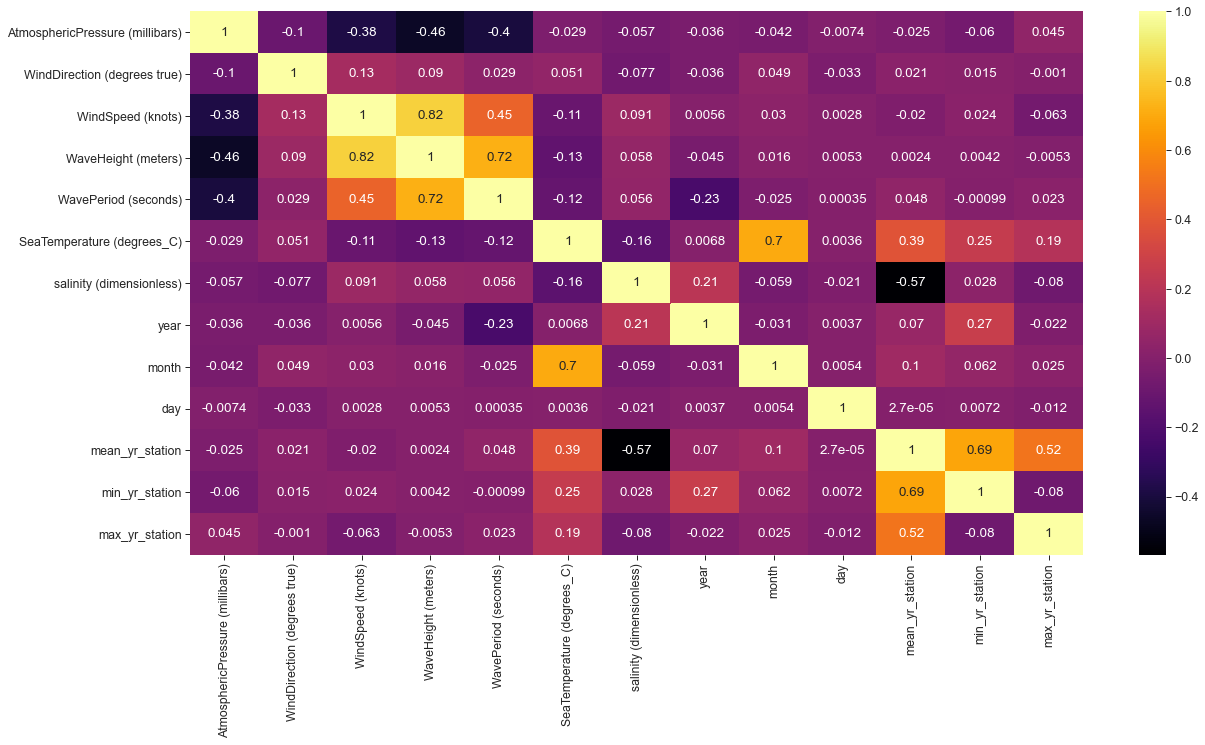

In [149]:
# Correlation of Weather Buoy variables
plt.figure(figsize=(20,10))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

m2_mx = m2_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(m2_mx, annot=True, cmap='inferno')

<AxesSubplot:>

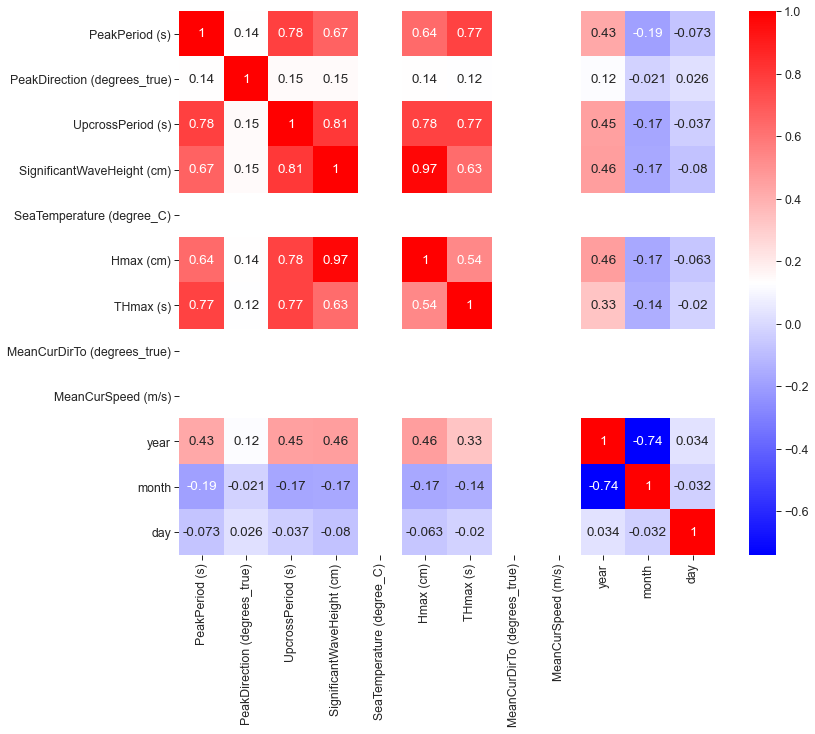

In [151]:
# Correlation of Wave Buoy variables
plt.figure(figsize=(12,10))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

wave_mx = wave_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(wave_mx, annot=True, cmap='bwr')

<AxesSubplot:xlabel='year', ylabel='month'>

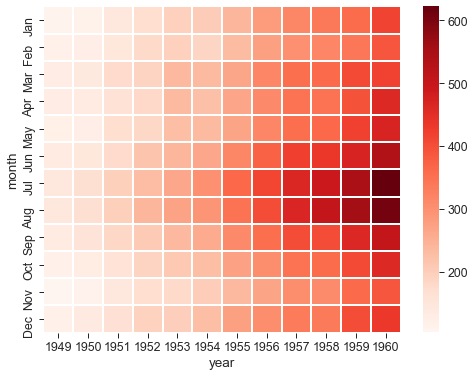

In [50]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Reds', linecolor='white', linewidth=1)

[Text(0.5, 1.0, 'M2 Irish Sea Avg Sea Temperature')]

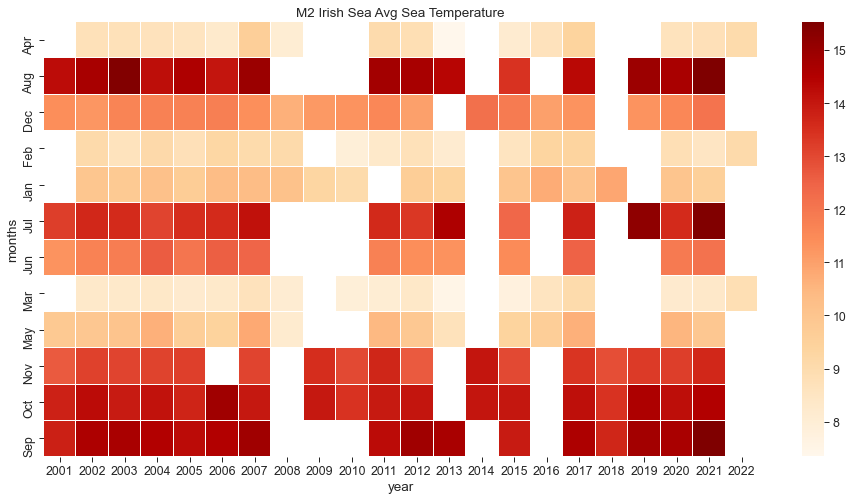

In [136]:
# Pivot Table showing temperature over the years by the months at a station
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
temperature_by_year = m2_df.pivot_table(index='months', columns='year', values='SeaTemperature (degrees_C)')
# You can separate data with lines
sns.heatmap(temperature_by_year, cmap='OrRd', linecolor='white', linewidth=0.01).set(title='M2 Irish Sea Avg Sea Temperature')

[Text(0.5, 1.0, 'Celtic Sea Wind Speed')]

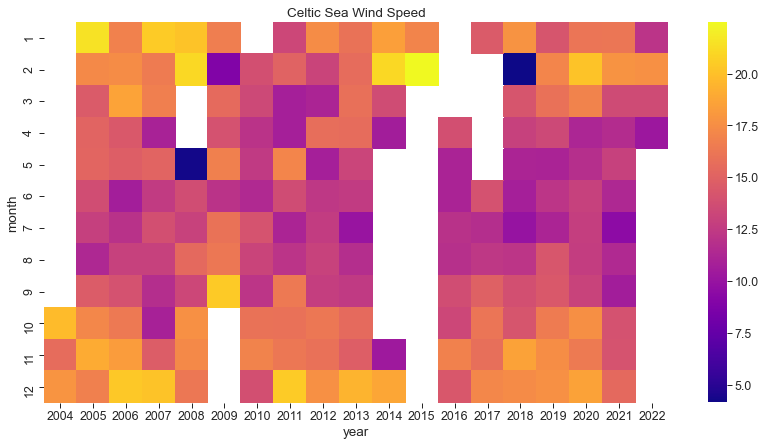

In [139]:
# Pivot Table showing wind speed over the years by the months at a station
plt.figure(figsize=(14,7))
sns.set_context('paper', font_scale=1.4)

# create a matrix with an index of month, columns representing years
wind_by_year = m5_df.pivot_table(index='month', columns='year', values='WindSpeed (knots)')
# separate data with lines
sns.heatmap(wind_by_year, cmap='plasma', linecolor='white', linewidth=0.0).set(title='Celtic Sea Wind Speed')

[Text(0.5, 1.0, 'Howth - Predicted Daily Tide Times')]

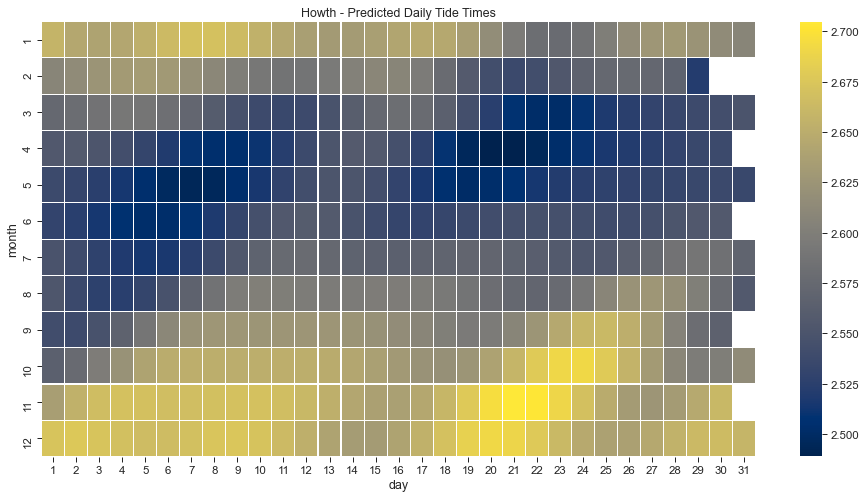

In [140]:
# Pivot Table showing temperature over the years by the months at a station
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.3)

# create a matrix with an index of month, columns representing years
tides = tide_pred_df.pivot_table(index='month', columns='day', values='Water_Level (metres)')
# You can separate data with lines
sns.heatmap(tides, cmap='cividis', linewidth=0.1).set(title='Howth - Predicted Daily Tide Times')

### Cluster Map

<Figure size 576x432 with 0 Axes>

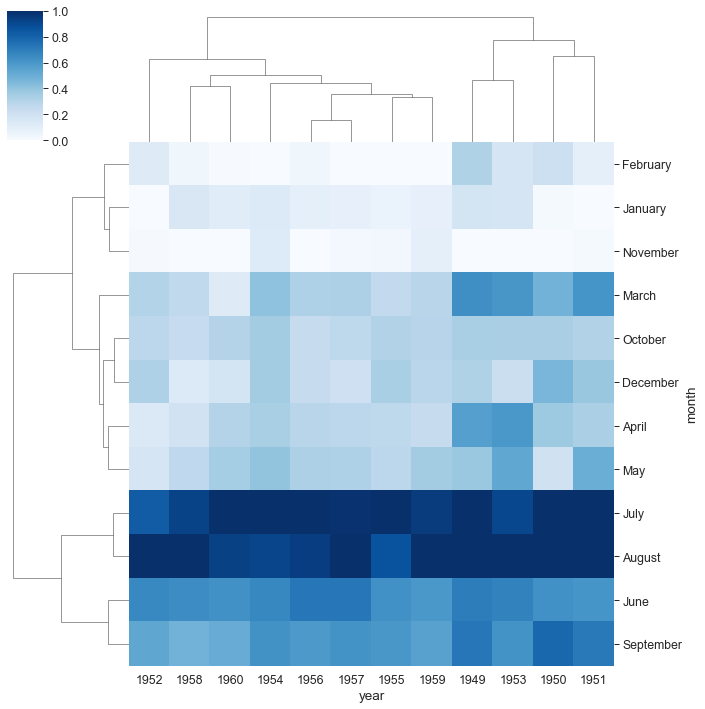

In [302]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


### PairGrid

<Figure size 576x432 with 0 Axes>

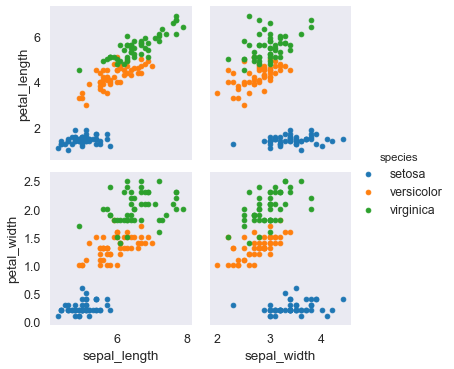

In [303]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()

### Facet Grid

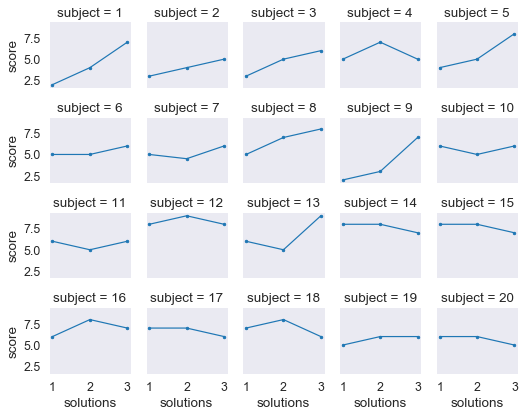

In [304]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression Plots

In [288]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

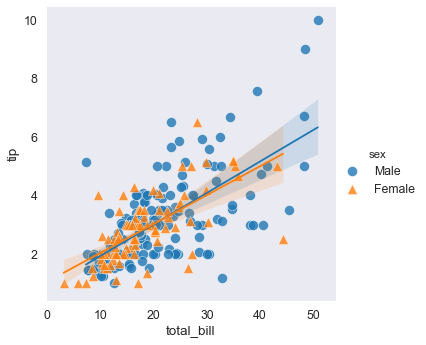

In [308]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

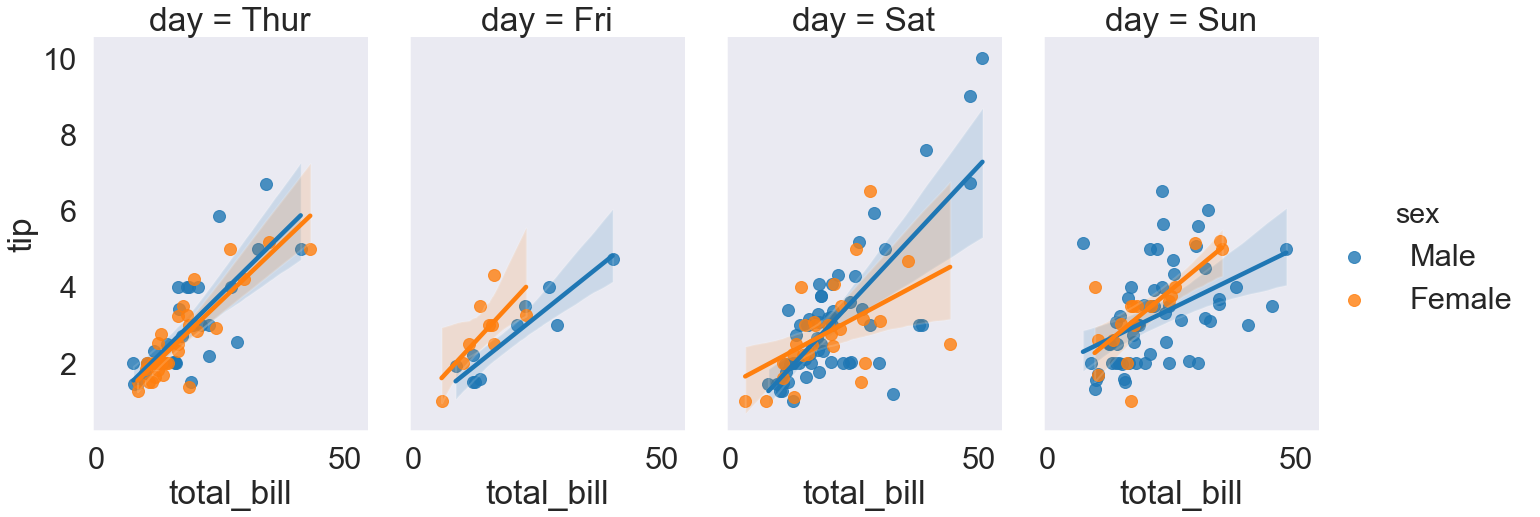

In [290]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)